# Midterm Project: The Productivity Gap
**Kira Rohra, Jamie Beatty, Carolyn Nguyen**

# Section 0: Background and Purpose
This is an analysis of the productivity pay gap. In recent years, productivity has climbed, but median income has not increased at the same rate. In this project, we attempt to analyze the discrepancies between productivity and median income in Canada. We used GDP as a measure of productivity, and median income as measure of worker compensation.

# Import the data sets and relevant Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
GDP=pd.read_csv("gdp.csv",delimiter=",")
median_income=pd.read_csv("median_income.csv")

# Cleaning the Median Income Data Frame

In [3]:
income_cols=median_income.columns.values[np.arange(1,47)]
income_cols
income_names=np.arange(1976,2022)
income_names
median_income.rename(columns=dict(zip(income_cols, income_names)), inplace=True)
median_income_clean=median_income.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,15,19,20,21,22
                                        ,23,24,24,25,26,27,28,29,30,31,32,33,34,35,36,37],axis="rows").reset_index()
median_income_cleaned=median_income_clean.drop('index',axis="columns")

#Removing the A's
median_income_cleaned.iloc[4, 1:67] = median_income_cleaned.iloc[4, 1:67].str.replace(r'(\d+)A', r'\1', regex=True)
median_income_cleaned=median_income_cleaned.drop([0,1,2,3],axis="rows")
median_income_cleaned=median_income_cleaned.melt().drop([0],axis="rows")
#median_income_cleaned

**Renaming Columns**

In [4]:
median_income_cleaned=median_income_cleaned.rename(columns={'variable': 'Year'})
median_income_cleaned=median_income_cleaned.rename(columns={'value': 'Median_Income'})
#median_income_cleaned

**Changing Median Income Column to a Float**

In [5]:
#Take out commas
median_income_cleaned["Median_Income"] = median_income_cleaned["Median_Income"].str.replace(r'(\d+),', r'\1', regex=True)
#median_income_cleaned
#Turn into float
median_income_cleaned["Median_Income"] = median_income_cleaned["Median_Income"].astype(float)
median_income_cleaned.head()

,Year,Median_Income
1,1976,33000.0
2,1977,33200.0
3,1978,33600.0
4,1979,33300.0
5,1980,33200.0


Here we have cleaned the Canadian median income dataset using regex, reshaping, and dropping unnecessary columns/rows. Statistics Canada added letters after figures to indicate the quality of the data, we used regex to remove the letters at the end of figures in order to be able to graph the data. Furthermore, we use functions such as melt and iloc to reshape and rename columns. We also changed the data type of some columns to let us graph them.

# Creating a Linear Regression Model of Median Income

In [6]:
model = LinearRegression()
model.fit(X = median_income_cleaned[['Year']], y = median_income_cleaned['Median_Income'])
model.coef_
model.intercept_
Rsq = model.score(X = median_income_cleaned[['Year']], y= median_income_cleaned['Median_Income'])
Rsq;

predictions = model.predict(X = median_income_cleaned[['Year']])
predictions;

0.528 is the coefficient of determination (R²) in our model for Median income. This indicates that it is moderately suitable for linear regression. The model coefficient was calculated to be 159, this means that for every one unit increase in the x axis, there is a 159 unit increase in the y axis. The intercept is (286193), and this means that at year 0, the income was negative. We know that this is not true, and this is just a result of the model fit.

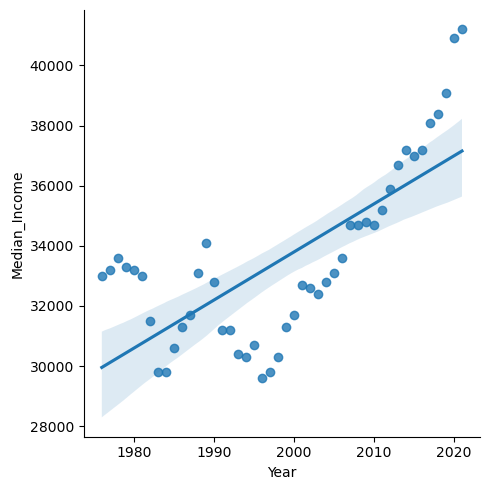

In [7]:
median_income_cleaned.astype(int)
sns.lmplot(data = median_income_cleaned.astype(float), x = "Year", y = "Median_Income")

# Plotting Median Income by Year

Text(0, 0.5, 'Median Income (CAD)')

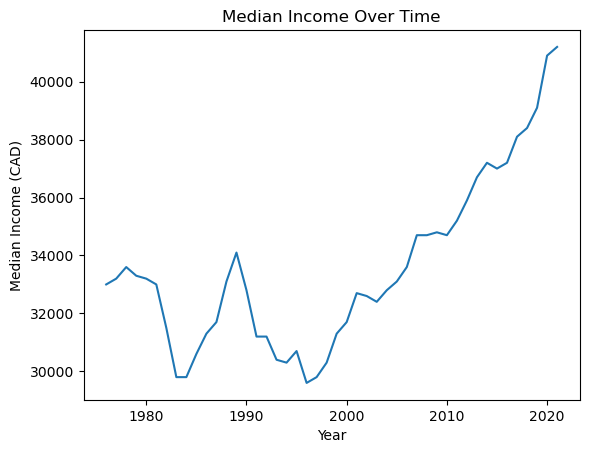

In [8]:
plt.plot(median_income_cleaned["Year"],median_income_cleaned["Median_Income"])
plt.title("Median Income Over Time")
plt.xlabel("Year")
plt.ylabel("Median Income (CAD)")

# Cleaning the GDP Data Frame

In [9]:
cols=GDP.columns.values[np.arange(4,67)]
names=np.arange(1960,2023)
GDP.rename(columns=dict(zip(cols, names)), inplace=True)
GDP=GDP.drop([0,1,2],axis="rows")
GDP=GDP.reset_index().drop("index",axis="columns")
GDP=GDP.drop(["Unnamed: 2","Unnamed: 3"],axis="columns")
Canada_GDP=GDP[GDP["Data Source"]=="Canada"]
#Canada_GDP


**Turning into a floating point format**

In [10]:
pd.options.display.float_format = '{:.0f}'.format
#Canada_GDP

**Using melt to change the format**

In [11]:
cols1=Canada_GDP.columns.values[np.arange(2,65)]
#cols1

rows1=Canada_GDP.iloc[0,:]
#rows1

In [12]:
Can_GDP_Cleaned=Canada_GDP.drop(["Data Source","World Development Indicators"],axis="columns")
#Can_GDP

In [13]:
rows1=rows1.drop(["Data Source","World Development Indicators"],axis="rows")

In [14]:
Can_GDP_Cleaned=Can_GDP_Cleaned.melt(var_name="Year",value_name="GDP in USD")
#Can_GDP_Cleaned
Can_GDP_Cleaned.head()

,Year,GDP in USD
0,1960,40461721693
1,1961,40934952064
2,1962,42227447632
3,1963,45029988561
4,1964,49377522897


Here we are cleaning the GDP dataset, using similar methods to clean the Median income dataset.

# Plotting GDP by Year, Canada

Text(0, 0.5, 'GDP (USD in trillions)')

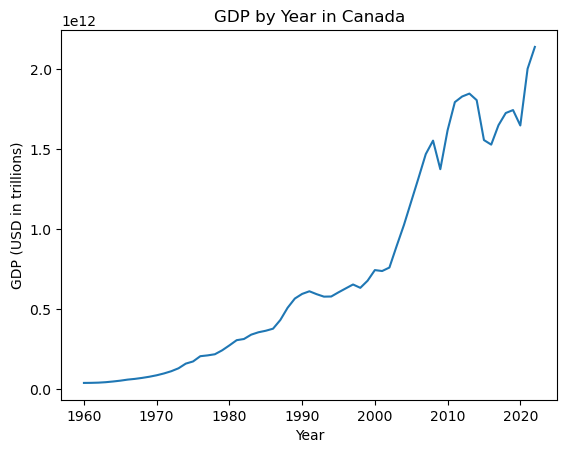

In [66]:
plt.plot(Can_GDP_Cleaned["Year"], Can_GDP_Cleaned["GDP in USD"])
plt.title("GDP by Year in Canada")
plt.xlabel('Year')
plt.ylabel('GDP (USD in trillions)')

This is a graph showing the increase in Canadian GDP from 1960 to 2021.

# Creating a Ratio between Median Income and GDP

In [35]:
median_income_cleaned = median_income_cleaned.reset_index()
median_income_cleaned = median_income_cleaned.drop(columns = ["index"])
#display(median_income_cleaned.head())
#display(Can_GDP_Cleaned.head())

In [36]:
#Create a new ratio data frame
Ratio_DF = pd.DataFrame()

#Starting 1976 - 2021 for GDP
Can_GDP_Cleaned = Can_GDP_Cleaned[Can_GDP_Cleaned['Year'] >= 1976]
Can_GDP_Cleaned = Can_GDP_Cleaned[Can_GDP_Cleaned['Year'] <= 2021]
#Joining the new 
#display(Can_GDP_Cleaned.tail())
#display(median_income_cleaned.tail())

In [37]:
#Joining the two dfs
joined_df = pd.merge(median_income_cleaned, Can_GDP_Cleaned, on='Year', how='outer')
#joined_df

In [38]:
#Creating a ratio column
joined_df["Ratio"] = joined_df["GDP in USD"]/joined_df["Median_Income"]
joined_df;

Text(0, 0.5, 'Ratio of GDP:Median Income(USD in millions)')

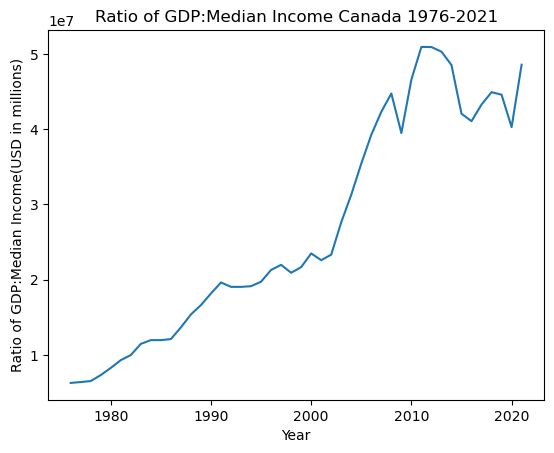

In [39]:
#Plotting the ratio
plt.plot(joined_df["Year"], joined_df["Ratio"])
plt.title("Ratio of GDP:Median Income Canada 1976-2021")
plt.xlabel('Year')
plt.ylabel('Ratio of GDP:Median Income(USD in millions)')

Here we have combined the Median Income dataset with the GDP dataset using an outer join. We created a new column called "Ratio" which was the ratio between GDP and Median income for each year. We then graphed this new ratio column to visualize at what rate GDP is growing in regards to Median income. As noted in the graph, the ratio between GDP and Median Income is increasing from 1976 to 2021, meaning that GDP is increasing at a much higher rate than Median Income.

Text(42.25000000000001, 0.5, 'GDP to Median Income Ratio (in 10^7)')

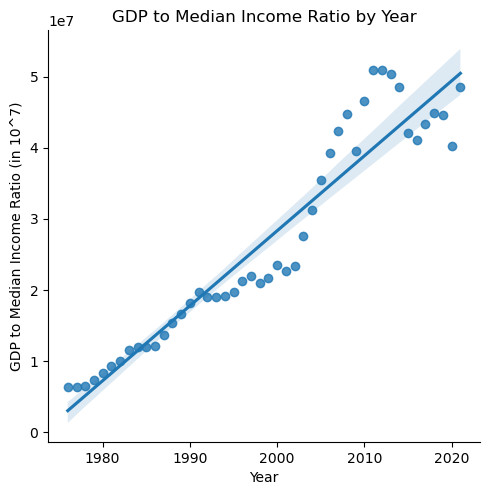

In [67]:
sns.lmplot(data = joined_df.astype(float), x = "Year", y = "Ratio")
plt.title("GDP to Median Income Ratio by Year")
plt.ylabel("GDP to Median Income Ratio (in 10^7)")


**Explanation of the Ratio**

By dividing GDP and Median income we can see how GDP grows compared to the median income in Canada. In the graph you can see that the ratio is increasing, and is especially steep from around 1980-2010. This means the GDP is growing at a much higher rate compared to median income. This is evidence of the productivity pay gap, with the overall economic output increasing at higher rate than average wages. More work is getting done for a lower rate.

# Split-Apply-Combine: Decade Analysis


In [68]:
merged_df = pd.merge(median_income_cleaned, Can_GDP_Cleaned, on='Year', how='inner')

# group by decades:
merged_df['Decade'] = merged_df['Year'].apply(lambda x: f"{(x // 10) * 10}-{(x // 10) * 10 + 9}")

# calculating the mean median income and GDP for each decade:
decade_summary = merged_df.groupby('Decade').agg({
    'Median_Income': 'mean',
    'GDP in USD': 'mean'
})
decade_summary.drop(decade_summary.tail(1).index,inplace=True)
display(decade_summary)

,Median_Income,GDP in USD
Decade,,
1970-1979,33275,220714500000
1980-1989,31810,385017500000
1990-1999,30760,616595700000
2000-2009,33310,1105544500000
2010-2019,36950,1709422000000


Text(0, 0.5, 'Mean of Median Income (USD)')

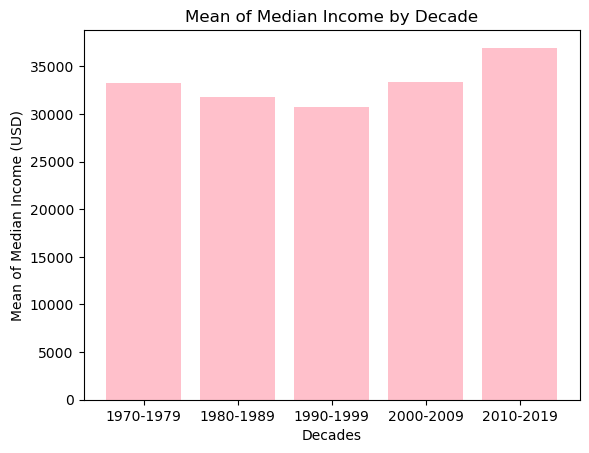

In [49]:
plt.bar(decade_summary.index,decade_summary["Median_Income"],color='pink')
plt.title("Mean of Median Income by Decade")
plt.xlabel("Decades")
plt.ylabel("Mean of Median Income (USD)")


Text(0.5, 1.0, 'Mean GDP by Decade')

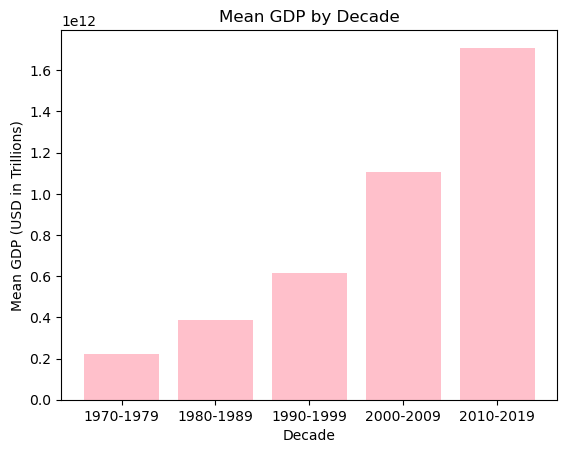

In [50]:
plt.bar(decade_summary.index, decade_summary['GDP in USD'], color = "pink")
plt.xlabel('Decade')
plt.ylabel('Mean GDP (USD in Trillions)')
plt.title('Mean GDP by Decade')

These two graphs are a decade analysis using split-apply-combine methods to analyze decades. As we can see, the mean of the median income by decade floats around 32,000, but the mean of the GDP by decade has large increases every decade, once again, we do not see a similar growth rate for median income by decade as we do for GDP.

## Conclusion

In conclusion, the findings of our project demonstrate a significant disparity between GDP growth and median income growth over the decades in Canada. The decade analysis, conducted using the split-apply-combine method, shows that while the mean median income remained relatively stable around 32,000, the mean GDP saw substantial increases with each passing decade. This indicates that GDP growth has not been accompanied by proportional increases in median income, suggesting a widening productivity-pay gap where the economic output of the country is increasing much faster than the average wages of its workers.
